Dataset Source: kaggle (https://www.kaggle.com/tunguz/big-five-personality-test)
<br><br> Attribute Information:

The scale was labeled 1=Disagree, 3=Neutral, 5=Agree

E - Surgency or Extraversion

EXT1	I am the life of the party.
EXT2	I don't talk a lot.
EXT3	I feel comfortable around people.
EXT4	I keep in the background.
EXT5	I start conversations.
EXT6	I have little to say.
EXT7	I talk to a lot of different people at parties.
EXT8	I don't like to draw attention to myself.
EXT9	I don't mind being the center of attention.
EXT10	I am quiet around strangers.

N - Emotional Stability or (not) Neuroticism

EST1	I get stressed out easily.
EST2	I am relaxed most of the time.
EST3	I worry about things.
EST4	I seldom feel blue.
EST5	I am easily disturbed.
EST6	I get upset easily.
EST7	I change my mood a lot.
EST8	I have frequent mood swings.
EST9	I get irritated easily.
EST10	I often feel blue.

A - Agreeableness

AGR1	I feel little concern for others.
AGR2	I am interested in people.
AGR3	I insult people.
AGR4	I sympathize with others' feelings.
AGR5	I am not interested in other people's problems.
AGR6	I have a soft heart.
AGR7	I am not really interested in others.
AGR8	I take time out for others.
AGR9	I feel others' emotions.
AGR10	I make people feel at ease.

C - Conscientiousness

CSN1	I am always prepared.
CSN2	I leave my belongings around.
CSN3	I pay attention to details.
CSN4	I make a mess of things.
CSN5	I get chores done right away.
CSN6	I often forget to put things back in their proper place.
CSN7	I like order.
CSN8	I shirk my duties.
CSN9	I follow a schedule.
CSN10	I am exacting in my work.

O - Openness to experience or Intellect or Imagination

OPN1	I have a rich vocabulary.
OPN2	I have difficulty understanding abstract ideas.
OPN3	I have a vivid imagination.
OPN4	I am not interested in abstract ideas.
OPN5	I have excellent ideas.
OPN6	I do not have a good imagination.
OPN7	I am quick to understand things.
OPN8	I use difficult words.
OPN9	I spend time reflecting on things.
OPN10	I am full of ideas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("8_OCEAN_data.csv",sep="\t")

In [2]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874429,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
874430,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
874431,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
874432,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df = pd.DataFrame(df_scaled,columns=df.columns)
directions = [1,-1,1,-1,1,-1,1,-1,1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,1,-1,1,1,1,1,-1,1,-1,1,-1,1,-1,1,1,1,-1,1,-1,1,-1,1,1,1,1]
for j in range(50):
    df.iloc[:,j] = directions[j] * df.iloc[:,j]

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,random_state=10)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=10)

0    178189
1    222885
2    181026
3    166348
4    125986
Name: EXT1, dtype: int64


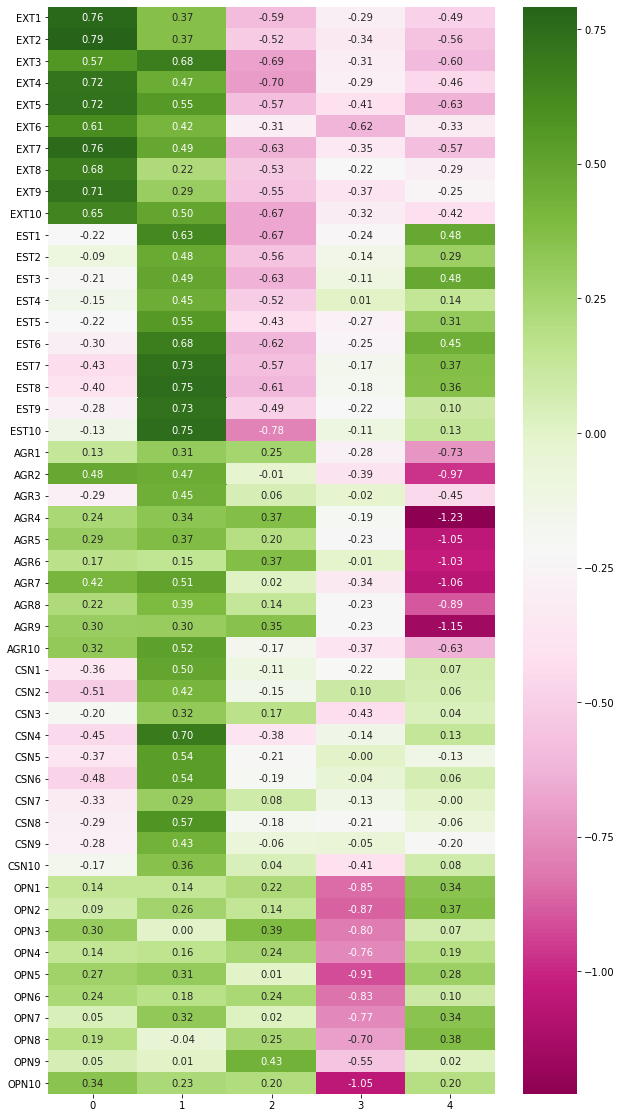

In [5]:
print(df.loc[:,"EXT1"].groupby(kmeans.labels_).count())
p_mean = df.groupby(kmeans.labels_).mean().transpose()
import seaborn as sns
plt.figure(figsize = (10,20))
ax = sns.heatmap(p_mean,yticklabels=df.columns.values,annot=True, fmt=".2f",cmap="PiYG")
# Observation: The five types of variables really mostly appear to be "packages"

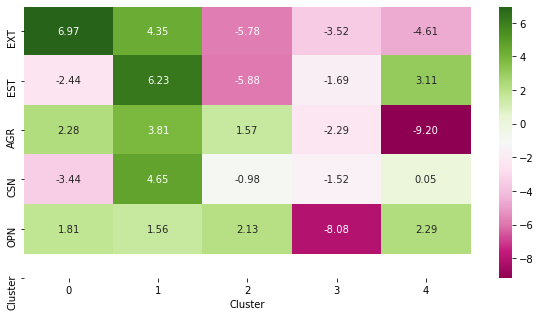

In [7]:
df2 = pd.DataFrame()
df2["EXT"] = df.loc[:,"EXT1":"EXT10"].sum(axis=1)
df2["EST"] = df.loc[:,"EST1":"EST10"].sum(axis=1)
df2["AGR"] = df.loc[:,"AGR1":"AGR10"].sum(axis=1)
df2["CSN"] = df.loc[:,"CSN1":"CSN10"].sum(axis=1)
df2["OPN"] = df.loc[:,"OPN1":"OPN10"].sum(axis=1)
df2["Cluster"] = kmeans.labels_
p_mean = df2.groupby("Cluster").mean().transpose()
import seaborn as sns
plt.figure(figsize = (10,5))
ax = sns.heatmap(p_mean,yticklabels=df2.columns.values,annot=True, fmt=".2f",cmap="PiYG")

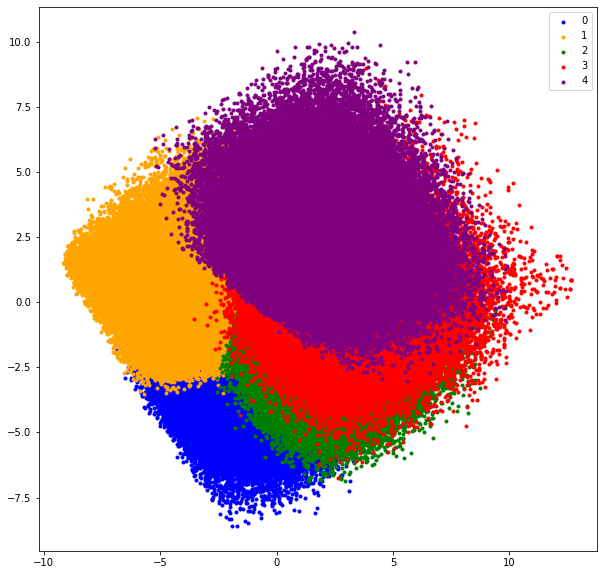

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
projected = pca.transform(df)

colors = ["blue","orange","green","red","purple"]
plt.figure(figsize=(10,10))
for i in range(5):
    Z = projected[kmeans.labels_ == i]
    plt.scatter(Z[:,0],Z[:,1],color=colors[i],s=9,label=i)
plt.legend(loc="upper right")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=5)
agg.fit(df)